In [21]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset from tensorflow datasets
data = tf.keras.datasets.cifar10

# Split the dataset into training and testing sets
(train_images_full, train_labels_full), (test_images, test_labels) = data.load_data()

In [22]:
# Normalize the images to be between 0 and 1
train_images_full, test_images = train_images_full / 255.0, test_images / 255.0

In [23]:
# Split the full training set into a validation set and a (smaller) training set
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images_full, train_labels_full, test_size=0.2, random_state=0)

In [24]:
# Define the model architecture using a Sequential model
model = tf.keras.models.Sequential([
    # First convolutional layer with 32 filters, followed by Batch Normalization
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),

    # Second convolutional layer with 32 filters, followed by Batch Normalization and Max Pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    # Repeat the same pattern but with 64 filters
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    # Repeat the same pattern but with 128 filters
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),

    # Fully connected layer with 128 units, followed by Batch Normalization and Dropout
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    # Output layer with 10 units (for the 10 classes)
    tf.keras.layers.Dense(10, activation='softmax')])

In [25]:
# Compile the model with Adam optimizer and sparse categorical crossentropy loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
# Train the model for 40 epochs and validate it on the test set
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_images, train_labels,
                    epochs=40,
                    validation_data=(val_images, val_labels),
                     batch_size=64,
                    callbacks=[early_stopping])

Epoch 1/40
625/625 [==============================] - 13s 12ms/step - loss: 1.7841 - accuracy: 0.3894 - val_loss: 1.2515 - val_accuracy: 0.5485
Epoch 2/40
625/625 [==============================] - 7s 11ms/step - loss: 1.2288 - accuracy: 0.5591 - val_loss: 0.9834 - val_accuracy: 0.6540
Epoch 3/40
625/625 [==============================] - 7s 11ms/step - loss: 1.0222 - accuracy: 0.6366 - val_loss: 0.8840 - val_accuracy: 0.6872
Epoch 4/40
625/625 [==============================] - 7s 11ms/step - loss: 0.9106 - accuracy: 0.6801 - val_loss: 0.7813 - val_accuracy: 0.7213
Epoch 5/40
625/625 [==============================] - 7s 11ms/step - loss: 0.8239 - accuracy: 0.7139 - val_loss: 0.7698 - val_accuracy: 0.7295
Epoch 6/40
625/625 [==============================] - 7s 11ms/step - loss: 0.7579 - accuracy: 0.7369 - val_loss: 0.7074 - val_accuracy: 0.7519
Epoch 7/40
625/625 [==============================] - 7s 11ms/step - loss: 0.7032 - accuracy: 0.7566 - val_loss: 0.7299 - val_accuracy: 0.752

In [27]:
test_loss_cnn, test_acc_cnn = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.4945 - accuracy: 0.8402 - 885ms/epoch - 3ms/step


In [28]:
print("Max Training Accuracy:", round(max(history.history['accuracy']), 4))
print("Max Validation Accuracy:", round(max(history.history['val_accuracy']), 4))
print("Min Loss:", round(min(history.history['loss']), 4))
print("Min Validation Loss:", round(min(history.history['val_loss']), 4))

Max Training Accuracy: 0.8681
Max Validation Accuracy: 0.8389
Min Loss: 0.3841
Min Validation Loss: 0.4921


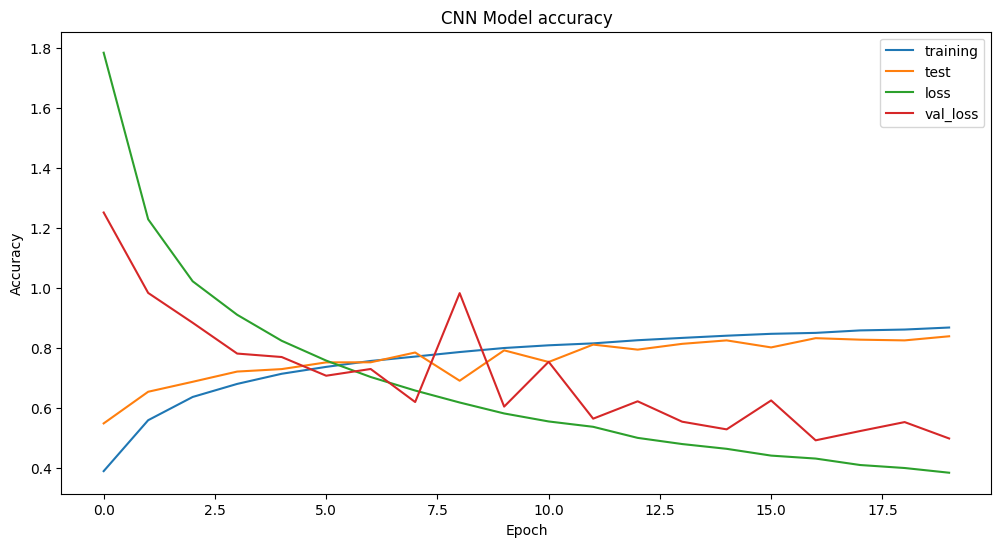

In [29]:
# Plot the training and validation accuracy and loss over the epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('CNN Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1.5])
plt.legend(loc='upper right')